# Graph demo in Raku

Anton Antonov  
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com)   
[RakuForPrediction-book at GitHub](https://github.com/antononcube/RakuForPrediction-book)      
June 2024  

In [2]:
#%js
    use Graph;
    use Graph::Random;
    use Graph::Path;
    use Graph::Distribution;
    use JavaScript::D3;

    my $gl = Graph::Random.new: Graph::Distribution::WattsStrogatz.new(50,0.1);
    
    my @res = $gl.find-shortest-path('1','20');

    $gl.edges(:dataset) 
    ==> js-d3-graph-plot(
        highlight => [|@res, |Graph::Path.new(@res).edges],
        background => 'none', 
        title-color => 'Ivory', 
        edge-thickness => 2,
        vertex-size => 3,
        width => 600,
        force => {charge => {strength => -160, iterations => 2}, y => {strength => 0.2}, collision => {radius => 6, iterations => 10}, link => {distance => 4}}
        )

-----

## Introduction

This Jupyter notebook -- a [Raku chatbook](https://raku.land/zef:antononcube/Jupyter::Chatbook) -- showcases the data and functionalities of the Raku package ["Graph"](https://raku.land/zef:antononcube/Graph).

The graphs are displayed with the Raku package ["JavaScript::D3"](https://raku.land/zef:antononcube/JavaScript:D3).  
(Using [D3.js force](https://d3js.org/d3-force).)

----

## Presentation plan

In [3]:
#% mermaid, background=1F1F1F
mindmap
    root((Graph demo))
        (**0** Setup)
            Graph
            JavaScript::D3
        (**1** Graph gallery)
        (**2** Graph creation)
            Paremeterized
            Individual
            Random
                Simple
                Distribution based
        (**3** Path finding)
            Shortest paths
            Many or all paths
        (Other)    
            Metrics
            Profiling
            LLM Graph assistant
                Definitions
                Properties

Graph demo 0 Setup 1 Graph gallery 2 Graph creation 3 Path finding Other Graph JavaScript::D3 Paremeterized Individual Random Shortest paths Many or all paths Metrics Profiling LLM Graph assistant Simple Distribution based Definitions Properties

------

## Setup

Here are loaded the packages used in the rest of notebook:

In [4]:
use Graph;

use Graph::Circulant;
use Graph::Complete;
use Graph::CompleteKaryTree;
use Graph::Cycle;
use Graph::Grid;
use Graph::Hypercube;
use Graph::KnightTour;
use Graph::Star;
use Graph::Path;
use Graph::Petersen;
use Graph::Wheel;

use Graph::Distribution;
use Graph::Random;

use Data::Reshapers;
use Data::Summarizers;
use Data::TypeSystem;
use Data::Translators;
use Data::Geographics;
use Math::DistanceFunctions;
use Math::Nearest;
use Hash::Merge;

use JavaScript::D3;
use WWW::MermaidInk;

### JavaScript

Here we prepare the notebook to visualize with JavaScript:

In [5]:
#% javascript
require.config({
     paths: {
     d3: 'https://d3js.org/d3.v7.min'
}});

require(['d3'], function(d3) {
     console.log(d3);
});

Verification:

In [6]:
#% js
js-d3-list-line-plot(10.rand xx 40, background => 'none', stroke-width => 2)

Here we set a collection of visualization variables:

In [7]:
my $title-color = 'Silver';
my $stroke-color = 'SlateGray';
my $tooltip-color = 'LightBlue';
my $tooltip-background-color = 'none';
my $background = '1F1F1F';
my $color-scheme = 'schemeTableau10';
my $edge-thickness = 3;
my $vertex-size = 6;
my $mmd-theme = q:to/END/;
%%{
  init: {
    'theme': 'forest',
    'themeVariables': {
      'lineColor': 'Ivory'
    }
  }
}%%
END
my %force = collision => {iterations => 0, radius => 10},link => {distance => 180};
my %force2 = charge => {strength => -30, iterations => 4}, collision => {radius => 50, iterations => 4}, link => {distance => 30};

my %opts = :$background, :$title-color, :$edge-thickness, :$vertex-size;

{background => 1F1F1F, edge-thickness => 3, title-color => Silver, vertex-size => 6}

### LLM graph assistant

In [8]:
#% chat ge prompt, model=gpt-3.5-turbo, max-tokens=4096, temperature=0.4
You are very knowledgeable expert on Graph theory,
You know the Graph theory Wikipedia pages better than anyone.
Your answers to Graph theory related questions are concise and clear.
You provide clear examples if relevant to your answers.
If specifically requested you can provide code for making or displaying Graphs.
Unless specifically specified otherwise, you use Wolfram Language (aka Mathematica) for your code examples.
Unless specifically requested, you do not include code in your answers.

Chat object created with ID : ge.

------

## Graph gallery

In [9]:
my %namedGraphs = 
    Barabasi-Albert => Graph::Random.new(Graph::Distribution::BarabasiAlbert.new(20,2)),
    Circulant => Graph::Circulant.new(7, 3),
    Complete => Graph::Complete.new(5),
    CompleteKaryTree => Graph::CompleteKaryTree.new(3,3),
    Cycle => Graph::Cycle.new(8),
    Grid => Graph::Grid.new(4,3),
    Hypercube => Graph::Hypercube.new(2),
    KnightTour => Graph::KnightTour.new(6,4),
    Path => Graph::Path.new('a'..'g', :directed),
    "Price's model" => Graph::Random.new(Graph::Distribution::Price.new(14, 2, 1)),
    Petersen => Graph::Petersen.new(),
    Random => Graph::Random.new(10,11),
    Star => Graph::Star.new(5),
    Watts-Strogatz => Graph::Random.new(Graph::Distribution::WattsStrogatz.new(20,0.07)),
    Wheel => Graph::Wheel.new(7, :!directed);

.say for %namedGraphs

Barabasi-Albert => Graph(vertexes => 20, edges => 36, directed => False)
Path => Graph(vertexes => 7, edges => 6, directed => True)
Watts-Strogatz => Graph(vertexes => 20, edges => 43, directed => False)
Price's model => Graph(vertexes => 14, edges => 25, directed => True)
Circulant => Graph(vertexes => 7, edges => 7, directed => False)
Star => Graph(vertexes => 6, edges => 5, directed => False)
CompleteKaryTree => Graph(vertexes => 13, edges => 12, directed => False)
Petersen => Graph(vertexes => 10, edges => 15, directed => False)
Cycle => Graph(vertexes => 8, edges => 8, directed => False)
Wheel => Graph(vertexes => 8, edges => 14, directed => False)
KnightTour => Graph(vertexes => 24, edges => 44, directed => False)
Random => Graph(vertexes => 10, edges => 11, directed => False)
Grid => Graph(vertexes => 12, edges => 17, directed => False)
Hypercube => Graph(vertexes => 4, edges => 4, directed => False)
Complete => Graph(vertexes => 5, edges => 10, directed => False)


In [10]:
#%js
%namedGraphs.pairs.sort(*.key).map({ 
    js-d3-graph-plot(
        $_.value.edges(:dataset),
        :$background, :$title-color, :$edge-thickness, :$vertex-size,
        directed => $_.value.directed,
        title => $_.key, 
        width => 400, 
        force => {charge => {strength => -200}, link => {minDistance => 40}}
    )
 }).join("\n")

------

## Graph creation (1-by-1)

### Complete graph

In [11]:
my $g = Graph::Complete.new(5,'node:');

Graph(vertexes => 5, edges => 10, directed => False)

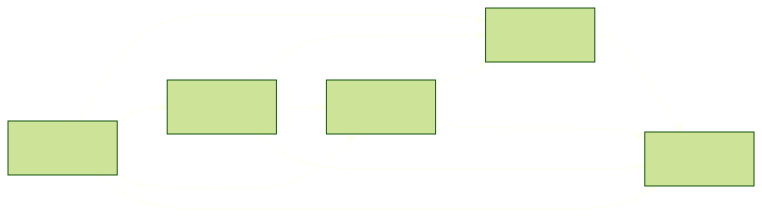

In [12]:
mermaid-ink($mmd-theme ~ "\n" ~ $g.mermaid, background => '1F1F1F', format => 'svg')

In [13]:
#%js
$g.edges(:dataset) 
==> js-d3-graph-plot(
        :$background, 
        :$title-color, 
        width => 700, 
        :$edge-thickness,
        :$vertex-size,
        force => {charge => {strength => -1800, iterations => 2}, collision => {radius => 40, iterations => 10}, link => {distance => 310}}
    )

In [14]:
#% html
$g.edges(:dataset) ==> to-html(field-names => <from to weight>)

from,to,weight
node:3,node:4,1
node:1,node:4,1
node:2,node:4,1
node:4,node:5,1
node:2,node:3,1
node:1,node:2,1
node:2,node:5,1
node:1,node:3,1
node:1,node:5,1
node:3,node:5,1


## Circulant graph

In [15]:
#%js
my $g = Graph::Circulant.new(5, 2);

$g.edges(:dataset) 
==> js-d3-graph-plot(
        :$background, 
        title-color => 'Silver',  
        width => 700, 
        :$edge-thickness,
        :$vertex-size,
        :%force
    )

### Complete K-ary tree

In [16]:
#%js
my $g = Graph::CompleteKaryTree.new(n => 4, k => 3, prefix => '', :directed);

$g.edges(:dataset) 
==> js-d3-graph-plot(
        :$background, 
        title-color => 'none',  
        width => 700, 
        :$edge-thickness,
        :$vertex-size,
        vertex-color => 'SlateBlue',
        :directed,
        force => {charge => {strength => -180, iterations => 2}, collision => {radius => 4, iterations => 1}, link => {minDistance => 10}}
    )

### Cycle graph

In [17]:
#%js
my $g = Graph::Cycle.new(9, prefx => 'c');

$g.edges(:dataset) 
==> js-d3-graph-plot(
        :$background, 
        :$title-color, 
        width => 700, 
        :$edge-thickness,
        :$vertex-size, 
        force => {charge => {strength => -1200, iterations => 2}, collision => {radius => 50, iterations => 1}, link => {minDistance => 30}}
    )

### Grid graph

In [18]:
#%js
my $g = Graph::Grid.new(rows => 5, columns => 7):directed;

$g.edges(:dataset) 
==> js-d3-graph-plot(
    :$background, 
    :$title-color, 
    width => 800, 
    :$edge-thickness,
    :$vertex-size,
    force => {charge => {strength => -400, iterations => 2}, collision => {radius => 4, iterations => 1}, link => {distance => 0}}
):d

### Hypercube

In [19]:
#%js
my $g = Graph::Hypercube.new(3);

$g.edges(:dataset) 
==> js-d3-graph-plot(
    :$background, 
    :$title-color, 
    width => 600, 
    :$edge-thickness,
    :$vertex-size,
    force => {charge => {strength => -2000, iterations => 2}, collision => {radius => 60, iterations => 1}, link => {distance => 0}}
)

### Knight tour

In [21]:
#%js
my $g = Graph::KnightTour.new(4, 6, prefix => 'node:');

$g.edges(:dataset) 
==> js-d3-graph-plot(
        :$background, 
        :$title-color, 
        height => 800, 
        :$edge-thickness, 
        :$vertex-size, 
        force => {x => {strength => .1}, y => {strength => .1}, charge => {strength => -300}, collision => {radius => 20}}
    )

Plot made with Mathematica:

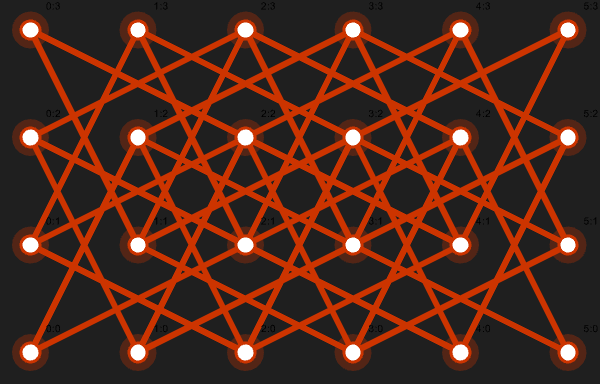

### Petersen graph

In [27]:
#%js
my $g = Graph::Petersen.new(prefix => '');

$g.edges(:dataset) 
==> js-d3-graph-plot(
        vertex-coordinates => $g.vertex-coordinates,
        :$background,     
        :$title-color, 
        width => 400, 
        height => 400,
        :$edge-thickness,
        :$vertex-size,
        :!directed,
        #force => {charge => {strength => -600}, link => {minDistance => 40}}
    )

### Star

In [28]:
#%js
my $g = Graph::Star.new(rays => 7, center => 'hub', prefix => 's:', :directed);

$g.edges(:dataset) 
==> js-d3-graph-plot(
        :$background, 
        :$title-color, 
        width => 600, 
        :$edge-thickness,
        :$vertex-size,
        :directed,
        force => {charge => {strength => -100, iterations => 2}, collision => {radius => 70, iterations => 10}, link => {minDistance => 20}}
    )

### Wheel graph

In [29]:
#%js
my $g = Graph::Wheel.new(spokes => 12, center => 'hub', prefix => 's:', :!directed);

$g.edges(:dataset) 
==> js-d3-graph-plot(
        :$background, 
        :$title-color, 
        width => 700, 
        :$edge-thickness,
        :$vertex-size,
        vertex-color => 'LightBlue',
        directed => $g.directed,
        force => {charge => {strength => -1800, iterations => 2}, collision => {radius => 10, iterations => 1}, link => {minDistance => 3}}
    )

Wheel graphs are Hamiltonian:

In [30]:
$g.find-hamiltonian-path('hub', 's:1').push('hub')

[hub s:2 s:3 s:4 s:5 s:6 s:7 s:8 s:9 s:10 s:11 s:12 s:1 hub]

### Random graph

In [31]:
#%js
my $gr = Graph::Random.new(100, 140, :directed);

js-d3-graph-plot($gr.edges, :$background, :$title-color, edge-thickness => 3, vertex-size => 4, width => 700)


-----

## Random graphs by distribution specs

In [32]:
my @dists =
    |(Graph::Distribution::Uniform.new((10..20).pick, (20..100).pick) xx 2), 
    Graph::Distribution::BarabasiAlbert.new(20,2),
    Graph::Distribution::Bernoulli.new(16,0.09),
    Graph::Distribution::Bernoulli.new(20,0.3),
    Graph::Distribution::WattsStrogatz.new(20,0.07),
    Graph::Distribution::Price.new(20, 2, 1);

.say for @dists

Graph::Distribution::Uniform.new(vertex-count => 10, edges-count => 61)
Graph::Distribution::Uniform.new(vertex-count => 19, edges-count => 24)
Graph::Distribution::BarabasiAlbert.new(vertex-count => 20, edges-count => 2)
Graph::Distribution::Bernoulli.new(vertex-count => 16, p => 0.09)
Graph::Distribution::Bernoulli.new(vertex-count => 20, p => 0.3)
Graph::Distribution::WattsStrogatz.new(vertex-count => 20, p => 0.07)
Graph::Distribution::Price.new(vertex-count => 20, edges-count => 2, attractiveness => 1)


In [33]:
#% js
my %opts = :$title-color, :$background, force => {charge => {strength => -120}, link => {minDistance => 10}}, width => 600;
@dists
    .map({ Graph::Random.new($_) })
    .map({ js-d3-graph-plot($_.edges(:dataset), 
            :$background, 
            :$title-color, 
            :$edge-thickness, :$vertex-size,
            width => 600,
            force => {charge => {strength => -170}}, 
            directed => $_.directed, title => $_.dist.gist) }).join("\n")

### [Barabasi-Albert model](https://en.wikipedia.org/wiki/Barabási–Albert_model)

In [34]:
#% js
my $gr = Graph::Random.new(Graph::Distribution::BarabasiAlbert.new(40, 2));
js-d3-graph-plot($gr.edges(:dataset), 
    width => 800, 
    :$background, 
    :$title-color, 
    :$edge-thickness,
    :$vertex-size,
    force => {charge => {strength => -300}, collision => {radius => 20}}
)

### [Price's model](https://en.wikipedia.org/wiki/Price's_model)

In [35]:
#% js
my $gr = Graph::Random.new(Graph::Distribution::Price.new(40, 2, 1));
js-d3-graph-plot($gr.edges(:dataset), 
    width => 800, 
    :$background, 
    :$title-color, 
    :$edge-thickness,
    :$vertex-size,
    directed => $gr.directed,
    force => {charge => {strength => -600}, y => {strength => 0.5}, collision => {radius => 40}}
)

### [Watts-Strogatz model](https://en.wikipedia.org/wiki/Watts–Strogatz_model)

In [36]:
#% js
my $gr = Graph::Random.new(Graph::Distribution::WattsStrogatz.new(50, 0.07));
js-d3-graph-plot($gr.edges(:dataset), 
        width => 800, 
        :$background, 
        :$title-color, 
        :$edge-thickness,
        :$vertex-size,
        directed => $gr.directed,
        force => {charge => {strength => -180, iterations => 2}, collision => {radius => 10, iterations => 1}, link => {minDistance => 3}}
)

------

## Large graph path finding

### Random graph

Create random graph with `600` vertexes and `500` edges:

In [37]:
my $tstart = now;

my $gl = Graph::Random.new(180, 200, :!directed);

my $tend = now;
say "Time to generate: {$tend - $tstart}";
say $gl;

Time to generate: 0.044259492
Graph(vertexes => 180, edges => 200, directed => False)


Visualize the random graph:

In [38]:
#%js
$gl.edges(:dataset) 
==> js-d3-graph-plot(
    :$background, 
    :$title-color, 
    :$edge-thickness,
    :$vertex-size,
    width => 1200, 
    force => {charge => {strength => -80, iterations => 2}, collision => {radius => 6, iterations => 10}, link => {distance => 4}}
)

### Shortest path finding

In [39]:
my ($start, $end) = ('7', '100');

(7 100)

In [40]:
my $tstart = now;
my @res = $gl.find-shortest-path($start, $end, method => 'dijkstra');
my $tend = now;
say "Time to find: {$tend - $tstart}";
say @res;
say "length: {@res.elems}"

Time to find: 0.006049589
[7 37 54 141 74 116 100]
length: 7


In [41]:
my $tstart = now;
my @res = $gl.find-shortest-path($start, $end, method => 'a-star');
my $tend = now;
say "Time to find: {$tend - $tstart}";
say @res;
say "length: {@res.elems}"

Time to find: 0.007715746
[7 37 54 141 74 116 100]
length: 7


In [42]:
#%js
$gl.edges(:dataset) 
==> js-d3-graph-plot(
    highlight => [|@res, |Graph::Path.new(@res).edges],
    :$background, 
    :$title-color, 
    :$edge-thickness,
    :$vertex-size,
    width => 1200, 
    force => {charge => {strength => -80, iterations => 2}, collision => {radius => 6, iterations => 10}, link => {distance => 4}}
    )

----
## Metrics

Diameter and radius of a graph:

In [43]:
<diameter radius>.map({ $_ => $gl."$_"() })

(diameter => Inf radius => Inf)

In [ ]:
#% chat ge > markdown
Define graph diameter, radius, eccentricity. Give punchline short, concise definitions.

In [ ]:
#% chat ge meta
say

### Vertex degree distribution

In [44]:
my %degrees = $gl.vertex-list.map({ $_ => $gl.vertex-degree($_) });

sink records-summary(%degrees.values.List)

+--------------------+
| numerical          |
+--------------------+
| Min    => 0        |
| Max    => 8        |
| 3rd-Qu => 3        |
| Median => 2        |
| 1st-Qu => 1        |
| Mean   => 2.222222 |
+--------------------+


In [45]:
#%js
js-d3-histogram(%degrees.values, :$background)

------

## Finding many paths

In [46]:
my @paths = $gl.find-path($start, $end, max-length => 14, count => 4);
@paths.elems;

.say for @paths

[7 23 149 17 43 74 36 178 85 111 105 69 100]
[7 23 149 17 43 74 36 178 85 145 133 34 105 69 100]
[7 23 149 17 43 74 36 178 85 145 139 105 69 100]
[7 23 149 17 43 74 36 178 85 145 154 111 105 69 100]


In [49]:
@paths.pick.rotor(2=>-1).map({ $_.head => $_.tail })

(7 => 23 23 => 149 149 => 17 17 => 43 43 => 74 74 => 36 36 => 178 178 => 85 85 => 145 145 => 133 133 => 34 34 => 105 105 => 69 69 => 100)

In [51]:
#%js
$gl.edges(:dataset) 
==> js-d3-graph-plot(
    :$background, 
    :$title-color,
    highlight => @paths.pick.rotor(2=>-1).map({ $_.head => $_.tail }).List,
    width => 1200, 
    :$vertex-size, 
    :$edge-thickness,
    force => {charge => {strength => -80, iterations => 2}, collision => {radius => 6, iterations => 10}, link => {distance => 4}}
)